# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,ConfusionMatrixDisplay
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import nltk
from nltk.util import pr
stemmer=nltk.SnowballStemmer("english")
import string
from nltk.corpus import stopwords
stopword=set(stopwords.words("english"))
import matplotlib.pyplot as plt
from matplotlib import style
from wordcloud import WordCloud

# Importing Dataset

In [2]:
#training data
train=pd.read_csv("twitter_data.csv")

# Exploring Dataset

In [3]:
train.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
train["labels"]=train["class"].map({0:"Hate Speech",1:"Offensive language",2:"No hate speech"})
train.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No hate speech
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive language


In [5]:
train["labels"].value_counts()

Offensive language    19190
No hate speech         4163
Hate Speech            1474
Name: labels, dtype: int64

In [6]:
#check for any missing values
train.isnull().values.any()


False

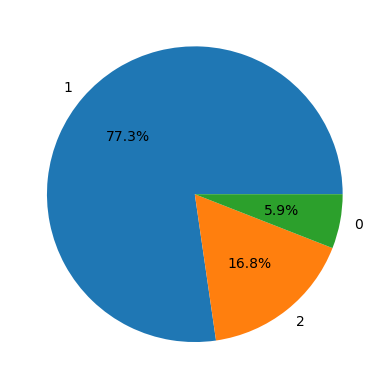

In [7]:
plt.pie(train['class'].value_counts().values,
        labels = train['class'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

# Data Preprocessing

In [8]:
train=train[["tweet","labels","class"]]
train.head()

,tweet,labels,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,No hate speech,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive language,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive language,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive language,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive language,1


In [9]:
def clean(text):
    text=str(text).lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('https?://\S+|www\.S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    text=[word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text=[stemmer.stem(word)for word in text.split(' ')]
    text=" ".join(text)
    return text
train["tweet"]=train["tweet"].apply(clean)
train.head()


,tweet,labels,class
0,rt mayasolov woman shouldnt complain clean ho...,No hate speech,2
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive language,1
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive language,1
3,rt cganderson vivabas look like tranni,Offensive language,1
4,rt shenikarobert shit hear might true might f...,Offensive language,1


# Balancing Dataset

In [10]:

class_2 = train[train['class'] == 2]
class_1 = train[train['class'] == 1]
class_0 = train[train['class'] == 0]
 
balanced_df = pd.concat([class_0, class_0,class_0,class_0,class_0,class_2,class_2,class_2,class_1], axis=0)
train=balanced_df
train['class'].value_counts()

1    19190
2    12489
0     7370
Name: class, dtype: int64

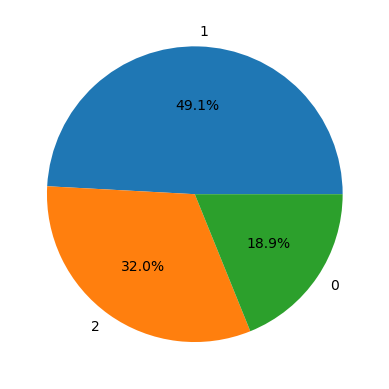

In [11]:
plt.pie(train['class'].value_counts().values,
        labels = train['class'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

# Wordcloud

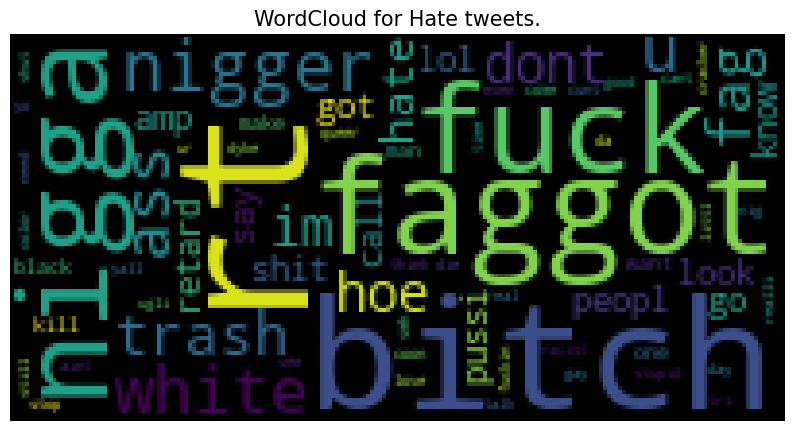

In [12]:
def plot_word_cloud(data):
  corpus = " ".join(data['tweet'])
 
  plt.figure(figsize = (10,10))
   
  # Forming the word cloud
  wc = WordCloud(max_words = 100,
                width = 200,
                height = 100,
                collocations = False).generate(corpus)
   
  # Plotting the wordcloud obtained above
  plt.title('WordCloud for Hate tweets.', fontsize = 15)
  plt.axis('off')
  plt.imshow(wc)
  plt.show()
  print()
 
plot_word_cloud(train[train['class']==0])

# Vectorize tweets using CountVectorizer

In [13]:
x=np.array(train["tweet"])
y=np.array(train["labels"])
cv=CountVectorizer(binary=True,stop_words='english')
x=cv.fit_transform(x)

# Train and Test Split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

# Model Building

In [15]:
clf=LogisticRegression()
clf.fit(x_train,y_train)
clf_predict=clf.predict(x_test)
clf_acc=accuracy_score(clf_predict,y_test)
print("test accuracy: {:.2f}%".format(clf_acc*100))

test accuracy: 93.83%


C:\Users\samya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Testing For Custom Input

In [17]:
test_data=""
train=cv.transform([test_data]).toarray()
print(clf.predict(train))

['Hate Speech']
